<center><img src="https://clevertap.com/wp-content/uploads/2018/03/Incontent_image.png"/></center>

<h1 style='text-align: center;'>Nguyễn Thế Đạt - RFM Project</h1>

># **Step 1. Install, import library and data set using in this project**

In [1]:
# Install library use in this notebook
!pip install squarify
!pip install openpyxl
!pip install plotly
!pip install jupyterlab-fonts

In [2]:
# Import library use in this notebook

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import squarify as sq

In [3]:
# Import dataset
df = pd.read_excel(r"C:\Users\kunbo\OneDrive\1. Học tập\Unigap - DAC\Python Module\Unigap\RFM Project\Final_project_RFM\ecommerce retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
segment = pd.read_excel(r"C:\Users\kunbo\OneDrive\1. Học tập\Unigap - DAC\Python Module\Unigap\RFM Project\Final_project_RFM\ecommerce retail.xlsx", sheet_name=1)
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


># **Step 2. Exploratory Data Analysis**

In [6]:
# Split RFM Scores by delimeter ' , ', and explode it to rows
segment_alt = (segment.set_index(['Segment']).apply(lambda x: x.str.split(',').explode()).reset_index())
segment_alt.columns = ['Segment', 'RFM_Scores']
segment_alt.head(5)

,Segment,RFM_Scores
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [7]:
# Explore data
segment_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Segment     125 non-null    object
 1   RFM_Scores  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [8]:
# Check null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [10]:
# Check duplicate values
df.duplicated().sum()

5268

In [11]:
# Drop duplicates values
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
# lowercase columns title for easier typing xD
df.columns = [col.lower() for col in df.columns]
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


incl = ["quantity"]
for col in df:
    if col in incl:
        print(f"Column {col} have: {df[col].unique()} values ")

In [13]:
# Change the negative quantity to positive values
df["quantity"] = df["quantity"].abs()
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
cancelled_orders = df[df['invoiceno'].astype(str).str.contains('C')]
cancelled_orders

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,C536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [15]:
print("We have", len(cancelled_orders), "cancelled orders")
total_orders = df['invoiceno'].nunique()
cancelled_num = len(cancelled_orders)

print(f"Percentage of orders cancelled: {cancelled_num}/{total_orders} ({cancelled_num/total_orders*100:.2f}%)")

We have 9251 cancelled orders
Percentage of orders cancelled: 9251/25900 (35.72%)


In [16]:
# Remove cancel invoices that start with "C" letter
df = df.drop(df[df["invoiceno"].astype("str").str.startswith('C')].index)
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
# Remove null values
df = df.dropna()

excl = []
for col in df:
    if col not in excl:
        print(f'Column {col} have: {df[col].unique()} values')

In [18]:
# Filter only UK for analysis because the other countries contribute unsignificant amount 
df = df[df['country'] == "United Kingdom"]
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [19]:
# Create revenue column 
df['revenue'] = df['quantity'] * df['unitprice']
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


__*Có 24 / 349227 dòng có giá trị revenue = 0 nên drop*__

In [20]:
# Remove those columns which revenue is zero
df['customerid'] = df['customerid'].astype("str")
df = df.drop(df[df['revenue'] == 0].index)
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [21]:
# Calculating Recency, Frequency, and Monetery
# Group invoice_date, invoice_no, revenue to calculate Recency, Frequency and Monetery
df_grouped = df.groupby(['customerid'], as_index=False).agg({'invoicedate': 'max', 'invoiceno': 'count', 'revenue': 'sum' })

# Sort values by customer_id
df_grouped = df_grouped.sort_values(by='customerid', ascending=True, ignore_index=True)

# Rename columns Frequency and Monetery
df_grouped.rename(columns={'invoicedate': 'max_date',
                           'invoiceno': 'Frequency',
                           'revenue': 'Monetary'}, inplace=True)

# Since the recency values is calculated by the time since last order compare to today's date. 
# We choose reference point for calculating recency values is 2017-12-31
cur_date = dt.datetime(2011,12,31,0,0,0)
df_grouped['Recency'] = (cur_date - df_grouped['max_date']).dt.days

RFM = df_grouped.drop('max_date', axis=1)
RFM

,customerid,Frequency,Monetary,Recency
0,12346.0,1,77183.60,346
1,12747.0,103,4196.01,23
2,12748.0,4412,33053.19,21
3,12749.0,199,4090.88,24
4,12820.0,59,942.34,24
...,...,...,...,...
3915,18280.0,10,180.60,298
3916,18281.0,7,80.82,201
3917,18282.0,12,178.05,28
3918,18283.0,721,2045.53,24


In [22]:
# Assign range for RFM then calculate R score, F score, and M score using quintiles method. R_variable range from 5 to 1 (in descending order) and R_variable will contain the integers 5, 4, 3, 2, and 1
# Note: set q parameter = 5 since we want to divide data into 5 quantiles
# Using qcut() function to calculate the recency score, frequency score, monetary score for each row. 
# pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

R_variable = range(5, 0, -1)
F_variable = range(1, 6)
M_variable = range(1, 6)

RFM['R_scores'] = pd.qcut(RFM['Recency'], q = 5, labels = R_variable)
RFM['F_scores'] = pd.qcut(RFM['Frequency'], q = 5, labels = F_variable)
RFM['M_scores'] = pd.qcut(RFM['Monetary'], q = 5, labels = M_variable)

# Change R+F+M_Scores to string data type to cancat RFM_Scores
RFM = RFM.astype({'R_scores': 'str', 'F_scores': 'str', 'M_scores': 'str'})
RFM['RFM_Scores'] = RFM['R_scores'] + RFM['F_scores'] + RFM['M_scores']
RFM

,customerid,Frequency,Monetary,Recency,R_scores,F_scores,M_scores,RFM_Scores
0,12346.0,1,77183.60,346,1,1,5,115
1,12747.0,103,4196.01,23,5,4,5,545
2,12748.0,4412,33053.19,21,5,5,5,555
3,12749.0,199,4090.88,24,5,5,5,555
4,12820.0,59,942.34,24,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,10,180.60,298,1,1,1,111
3916,18281.0,7,80.82,201,1,1,1,111
3917,18282.0,12,178.05,28,5,1,1,511
3918,18283.0,721,2045.53,24,5,5,5,555


**_Random check the values_**

In [23]:
# Random check some customer_id 
## Random check Monetary:
df.loc[df['customerid'] == '12748.0','revenue'].sum()
df.loc[df['customerid'] == '18281.0','revenue'].sum()

## Random check Recency:
df_grouped 
# df_grouped.loc[df_grouped['customer_id'] == '12346.0']
time = df_grouped.set_index('customerid')
check = cur_date - (time.loc['12346.0', 'max_date'])
check.days

## Random check Frequency:
df.loc[df['customerid'] == '12747.0','invoiceno'].count()

validate_rfm = df[df['customerid'] == '12747.0']

validate_rfm['revenue'].sum()
validate_rfm['invoiceno'].count()

time = df_grouped.set_index('customerid')
check = cur_date - (time.loc['12747.0', 'max_date'])
check.days

23

*__Convert RFM_Scores column of segment_alt and RFM tables to int64 type for merging__*

In [24]:
RFM = RFM.astype({'RFM_Scores': 'int64'})

segment_alt = segment_alt.astype({'RFM_Scores': 'int64'})

segment_alt.info()
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Segment     125 non-null    object
 1   RFM_Scores  125 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  3920 non-null   object 
 1   Frequency   3920 non-null   int64  
 2   Monetary    3920 non-null   float64
 3   Recency     3920 non-null   int64  
 4   R_scores    3920 non-null   object 
 5   F_scores    3920 non-null   object 
 6   M_scores    3920 non-null   object 
 7   RFM_Scores  3920 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 245.1+ KB


In [25]:
merged_rfm = RFM.merge(segment_alt, left_on='RFM_Scores', right_on ='RFM_Scores', how='left')
merged_rfm

,customerid,Frequency,Monetary,Recency,R_scores,F_scores,M_scores,RFM_Scores,Segment
0,12346.0,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12747.0,103,4196.01,23,5,4,5,545,Champions
2,12748.0,4412,33053.19,21,5,5,5,555,Champions
3,12749.0,199,4090.88,24,5,5,5,555,Champions
4,12820.0,59,942.34,24,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3915,18280.0,10,180.60,298,1,1,1,111,Lost customers
3916,18281.0,7,80.82,201,1,1,1,111,Lost customers
3917,18282.0,12,178.05,28,5,1,1,511,New Customers
3918,18283.0,721,2045.53,24,5,5,5,555,Champions


In [26]:
merged_rfm.groupby('Segment').agg({
'Recency':['mean'],
'Frequency':['mean','min','max','count'],
'Monetary':['mean','min','max']}).round(1)

Recency Frequency                 Monetary         \
                         mean      mean min   max count     mean    min   
Segment                                                                   
About To Sleep          109.9      21.8   1    84   177    285.1   36.6   
At Risk                 172.3      79.9  14   521   379   1409.8  252.8   
Cannot Lose Them        240.9      53.8   1   297    80   3477.1  464.0   
Champions                31.7     277.9  58  7676   719   5983.6  891.2   
Hibernating customers   171.7      22.9   1    57   723    382.4   13.3   
Lost customers          296.7      11.6   1    74   392    172.2    3.8   
Loyal                    59.4     120.6  30   656   366   2295.3  471.4   
Need Attention           53.3      58.0  15   119   223   1394.7  465.9   
New Customers            50.0      10.7   1    29   271    197.4    6.2   
Potential Loyalist       49.0      60.3  14   250   459    555.6  108.8   
Promising                38.7      16.6   1    29   131   2414.3  114.3   

                                 
                            max  
Segment                          
About To Sleep            877.4  
At Risk                 10254.2  
Cannot Lose Them        77183.6  
Champions              259657.3  
Hibernating customers     885.2  
Lost customers            440.0  
Loyal                   80850.8  
Need Attention          26879.0  
New Customers             460.6  
Potential Loyalist        889.9  
Promising              168472.5

In [27]:
avg_rfmscores = merged_rfm.astype({'R_scores': 'int64'
                                  ,'F_scores': 'int64'
                                  ,'M_scores': 'int64'})

avg_rfmscores.groupby('Segment').agg({
'R_scores':['mean'],
'F_scores':['mean','min','max','count'],
'M_scores':['mean','min','max']}).round(0)

R_scores F_scores               M_scores        
                          mean     mean min max count     mean min max
Segment                                                               
About To Sleep             2.0      2.0   1   4   177      2.0   1   3
At Risk                    2.0      4.0   2   5   379      4.0   2   5
Cannot Lose Them           1.0      2.0   1   5    80      4.0   3   5
Champions                  5.0      5.0   4   5   719      5.0   4   5
Hibernating customers      2.0      2.0   1   3   723      2.0   1   3
Lost customers             1.0      1.0   1   4   392      1.0   1   2
Loyal                      3.0      4.0   3   5   366      4.0   3   5
Need Attention             4.0      3.0   2   4   223      4.0   3   5
New Customers              4.0      1.0   1   2   271      1.0   1   2
Potential Loyalist         4.0      3.0   2   5   459      3.0   1   3
Promising                  4.0      2.0   1   2   131      3.0   1   5

># **Step 3. Vizualization Data**

*__Phân tích Distribution của 3 chỉ số RFM__*

C:\Users\kunbo\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunbo\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


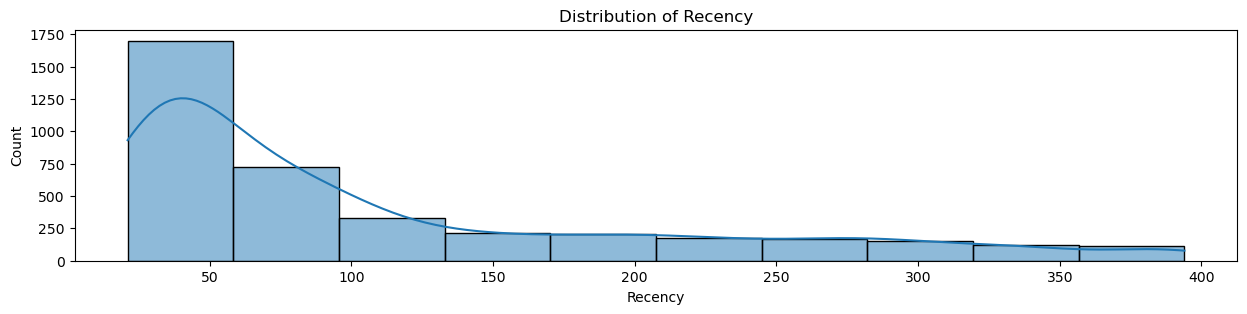

C:\Users\kunbo\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunbo\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


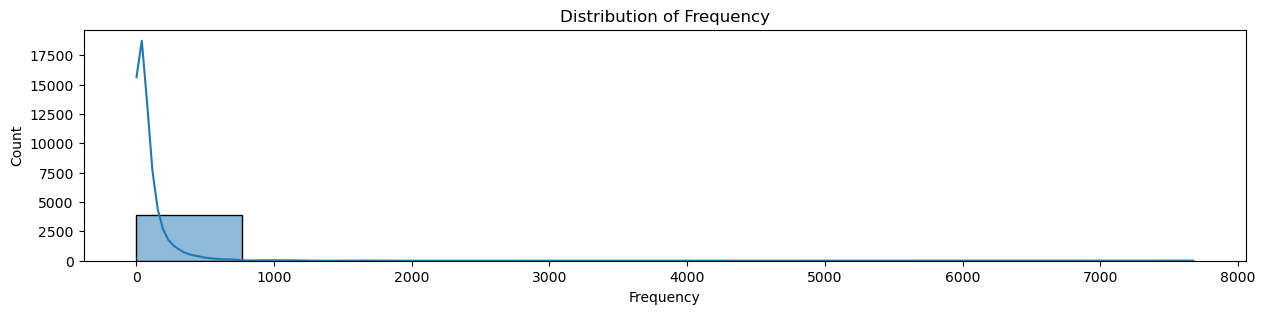

C:\Users\kunbo\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunbo\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


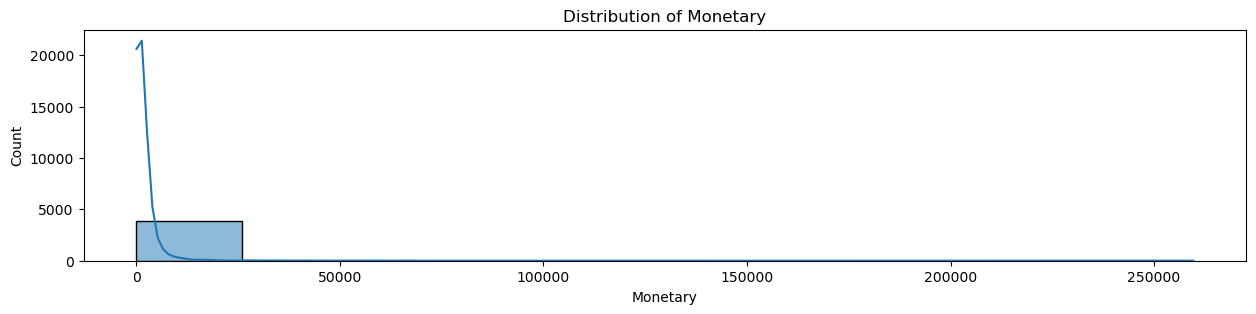

In [28]:
column_names = ['Recency', 'Frequency', 'Monetary']

for col in column_names:
    fig, ax = plt.subplots(figsize=(15,3))
    sns.histplot(merged_rfm[col], kde=True, bins=10)
    ax.set_title(f'Distribution of {col}')
    plt.show()

*__Prepare data to create Treemap__*

In [29]:
# Group columns to create tree map
group_segment = merged_rfm.groupby(['Segment']).agg({'customerid': 'count', 'Monetary': 'sum', 'Recency': 'mean'}).reset_index()
group_segment.sort_values(by='customerid', ascending=False, ignore_index=True)

# Rename columns
group_segment.rename(columns={'Segment': 'segment'
                             ,'customerid': 'customer_count'
                             ,'Monetary': 'monetary_sum'
                             ,'Recency': 'recency_mean'}, inplace=True)
group_segment


,segment,customer_count,monetary_sum,recency_mean
0,About To Sleep,177,50468.550,109.864407
1,At Risk,379,534329.120,172.255937
2,Cannot Lose Them,80,278170.731,240.875000
3,Champions,719,4302192.340,31.696801
4,Hibernating customers,723,276452.862,171.659751
5,Lost customers,392,67515.820,296.742347
6,Loyal,366,840073.420,59.355191
7,Need Attention,223,311012.100,53.282511
8,New Customers,271,53505.540,50.025830
9,Potential Loyalist,459,255027.051,49.015251


In [30]:
group_segment['customer_perc'] = group_segment['customer_count'] / group_segment['customer_count'].sum()
group_segment['monetary_perc'] = group_segment['monetary_sum'] / group_segment['monetary_sum'].sum()
group_segment.sort_values(by='customer_count',ascending=False)

,segment,customer_count,monetary_sum,recency_mean,customer_perc,monetary_perc
4,Hibernating customers,723,276452.862,171.659751,0.184439,0.037948
3,Champions,719,4302192.340,31.696801,0.183418,0.590553
9,Potential Loyalist,459,255027.051,49.015251,0.117092,0.035007
5,Lost customers,392,67515.820,296.742347,0.100000,0.009268
1,At Risk,379,534329.120,172.255937,0.096684,0.073346
6,Loyal,366,840073.420,59.355191,0.093367,0.115315
8,New Customers,271,53505.540,50.025830,0.069133,0.007345
7,Need Attention,223,311012.100,53.282511,0.056888,0.042692
0,About To Sleep,177,50468.550,109.864407,0.045153,0.006928
10,Promising,131,316277.110,38.656489,0.033418,0.043415


*__Set up params to visualize Frequency Distribution__*

NameError: name 'colors' is not defined

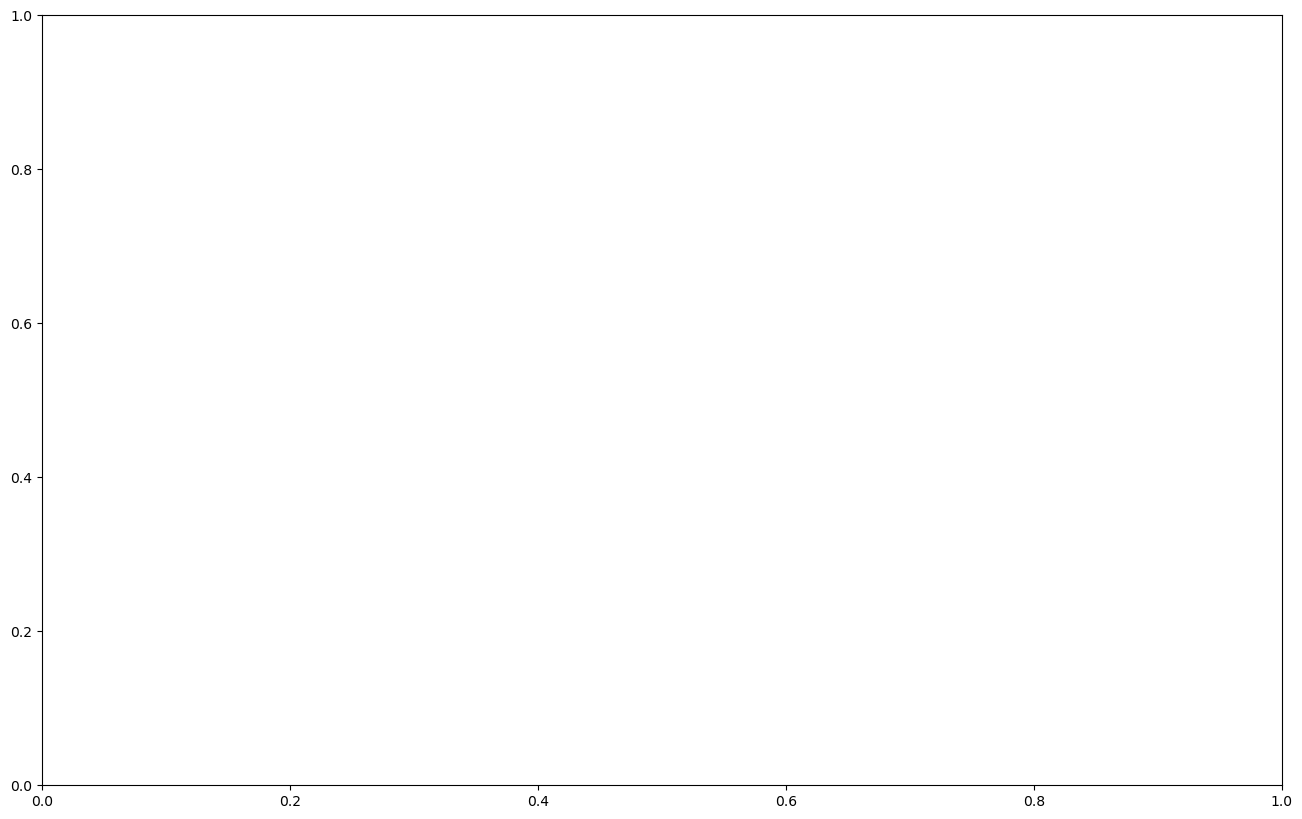

In [31]:
fig, ax = plt.subplots(figsize = (16, 10))
sizes = group_segment['monetary_sum']
labels = group_segment['segment']

# Create treemap using squarify library
fig = sq.plot(sizes=sizes,
        label=labels,
        value= [f'{x*100:.2f}%' for x in group_segment['monetary_perc']],
        color=colors,
        alpha=.8,
        text_kwargs={'fontsize': 10, 'weight': 'bold'}
       )
# Remove cluster, and update layout
plt.axis(False)
plt.title('RFM Segment by Revenue & Percentage',
         fontdict={'size': 14, 'weight': 'bold'},
         pad=15, loc='left')
sns.set_style(style='whitegrid')
plt.show()


In [ ]:
#Set up params
colors = sns.color_palette('Spectral', len(group_segment['segment']))
# colors = sns.color_palette('BrBG', len(group_segment['segment']))
fig, ax = plt.subplots(figsize = (16, 10))
sizes = group_segment['customer_count']
labels = group_segment['segment']

# Create treemap using squarify library
fig = sq.plot(sizes=sizes,
        label=labels,
        value= [f'{x*100:.2f}%' for x in group_segment['customer_perc']],
        color=colors,
        alpha=.8,
        text_kwargs={'fontsize': 10, 'weight': 'bold'}
       )
# Remove cluster, and update layout
plt.axis(False)
plt.title('RFM Segment by Customer Count & Percentage',
         fontdict={'size': 14, 'weight': 'bold'},
         pad=15, loc='left')
sns.set_style(style='whitegrid')
plt.show()

# sns.set_style(style="whitegrid") # set seaborn plot style
# sizes= df["values"].values# proportions of the categories
# label=df["labels"]
# squarify.plot(sizes=sizes, label=label, alpha=0.6, color=colors).set(title='Treemap with Squarify')
# plt.axis('off')
# plt.show()

In [ ]:
# sns.countplot(y='Segment' , data = merged_rfm, order=merged_rfm['Segment'].value_counts().index)
# plt.show()

# colors = sns.color_palette(palette='Spectral', n_colors=len(merged_rfm['Segment']))

ax = sns.countplot(y=merged_rfm['Segment'],
                   order=merged_rfm['Segment'].value_counts(ascending=False).index, palette=color)

abs_values = merged_rfm['Segment'].value_counts(ascending=False) # Present count of segment in absolute number

rel_values = merged_rfm['Segment'].value_counts(ascending=False, normalize=True).values * 100 # Present count of segment in relative number

lbls = [f' {p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)] # Concat by list comprehension and formatted string

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=12)
sns.set_theme(style='darkgrid', rc={'figure.figsize':(16,10)})
plt.title('Highest to Lowest Frequency by Segment',
         fontdict={'size': 14, 'weight': 'bold'},
         pad=15, loc='left')



In [ ]:
group1 = group_segment.copy()
group1[['monetary_sum', 'recency_mean']] = group1[['monetary_sum','recency_mean']].round(0)
# group1 = group1.astype({'segment': 'category'})

# Set up plot's params:
order = group1.groupby('segment').sum().sort_values('monetary_sum', ascending=False).index
# color = sns.color_palette(palette='Spectral', n_colors=len(group1['segment']))

ax = sns.barplot(group1,
                 y='segment',
                 x='monetary_sum',
                 order=order, palette=color)

sns.set_theme(style='darkgrid', rc={'figure.figsize':(16,10)})

plt.title('Highest to Lowest Monetary by Segment',
         fontdict={'size': 14, 'weight': 'bold'},
         pad=15, loc='left')

# Set comma seperated for data labels
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}', fontsize=12)
    
plt.show()

In [ ]:
# merged_rfm.groupby(['R_scores', 'F_scores']).agg({'customerid': 'count'})
calculate = merged_rfm.astype({'R_scores': 'int64'
                              ,'F_scores': 'int64'
                              ,'M_scores': 'int64'})
calculate.groupby(['Segment']).agg({'R_scores': 'mean'}).round(0)

# **Step 4: Report and Analysis**


**The project implementation has been divided into 4 parts as follows:**

1.   *Exploratory Data Analysis(EDA)*
2.   *Customer Segmentation using RFM*
3.   *Visualize Data*
4.   *Recommendation*

They have been discussed in detail as shown below.

**Part 1: Exploratory Data Analysis(EDA)**

The first step is to analyse exploratory data (EDA). The EDA is useful for understanding data, discovering patterns, and detecting anomalies or null values in a dataset. The following steps have been taken:

* Examining the dataset's shape, columns, and top 5 head, tail, and sample values for each column.
* The next step was to determine whether or not the dataset contained null and duplicate values. It was discovered that the fields 'Description' and 'CustomerID' contained some null values.
* Then I checked for duplicate values and removed them with the '.dropna()', 'drop_duplicates()'. I also remove the invoiceno cancelled with invoice_no start with "c" character.
* I also explore that the quantity and price columns have abnomally negative, and zero values.
* With quantity column I used function abs() to fix it, meanwhile the abnormal values of price column quite litte 24 / over 300k rows so I dropped it.
* I also filter only country UK because it account for significant data of the dataset

**Part 2: Customer Segmentation using RFM**

Next step is using the clean data set to calculate R-F-M Scores and RFM Segment base on the existing RFM Score and Segment. I have used the *__QUINTILES METHOD__* to calculate the RFM Scores.

* First I created revenue column by multiply 'quantity' and 'price' column
* Then I calculate the R-F-M values and use *__qcut()__* method to calculate the RFM scores.

**Part 3: Visualize Data**

* Finally I detect the distribution of Recency, Frequency, and Monetary value by histplot chart and find out that the Recency of this company is quite good, base on the number of transaction made within 50 days is highest. Meanwhile the F&M chart doesn't show much insight.
* Then I use treemap and barplot to see the contribution by Frequency and Monetary and find out:
>1. __Top 5 Spending by Segment are: Champion, Loyal, At Risk, Promising, and Need Attention__
>2. __Top 5 Number of transactions by Segment are: Hibernating, Champions, Potential Loyalist, Lost customers, and At Risk__

**Part 4: Recommendation**

* In conclusion, company should focus to improve the RFM values with some marketing and promotion campaigns specialize for each segment because each segment have distinct behaviours
>* With *__Champion, Need Attention and Loyal__* segments we should maintain updated product information and current promotional programs. Encourage them to buy more to get more discount, and take a good care for this line of customers.
>* With *__Promising and Potential Loyalist__* segments we should use some special discount code or promotion program encourage them to maintain their good Recency + Frequency values and increase their spending each visit.
>* With *__Hibernating and At Risk__* customers we should remind them by some email or phonecall, or promote special programs like "Come back deal" to inspire them comback to shopping.
>* With *__Lost customers__* we should launch some survey to find out why they don't comeback to findout and improve it.


># References list:
>[1. Hướng dẫn drop rows dựa trên điều kiện](https://saturncloud.io/blog/how-to-drop-pandas-dataframe-rows-based-on-a-condition-a-comprehensive-guide/) \
>[2. How to create tree map in python](https://www.analyticsvidhya.com/blog/2021/10/how-to-build-a-treemap-in-3-ways-using-python/) \
>[3. Color palete using seaborn method](https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/) \
>[4. Hướng dẫn tạo treemap với thư viện squarify](https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/) \
>[5. Displot and Histplot](https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751)\
>[6. Hướng dẫn tạo treemap với thư viên plotly](https://www.youtube.com/watch?v=10enchtesBo&ab_channel=CodingIsFun) \
>[7. Other 1](https://www.youtube.com/watch?v=YREIn1uTYO0&ab_channel=Deepsim) \
>[8. Other 2](https://www.youtube.com/watch?v=YREIn1uTYO0&ab_channel=Deepsim) \
>[9. Hướng dẫn split array to multiple rows](https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe)